<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-Team-8/kaggle-challenge-Team-8/blob/main/Kaggle_challenge_Team_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
# Installing H2O package
!pip install H2o

In [131]:
#installing fancyimpute package
!pip install fancyimpute

In [132]:
# Importing necessary libraries and loading training data
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Loading training data from the provided URL
training_data = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Team-8/kaggle-challenge-Team-8/main/train.csv'
train_original = pd.read_csv(training_data)

# Displaying summary statistics of the training data
train_original.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [133]:
train_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [134]:
train_original.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [135]:
# Loading and displaying information about the test data
test_data = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-Team-8/kaggle-challenge-Team-8/main/test.csv'
test_original = pd.read_csv(test_data)
test_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [136]:
test = test_original.copy()
train = train_original.copy()

In [137]:
# Dropping unnecessary columns from both training and test data
train.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True)
test.drop(['PassengerId','Name','Cabin'],axis=1, inplace=True)

In [138]:
# Displaying the first few rows of the test data
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


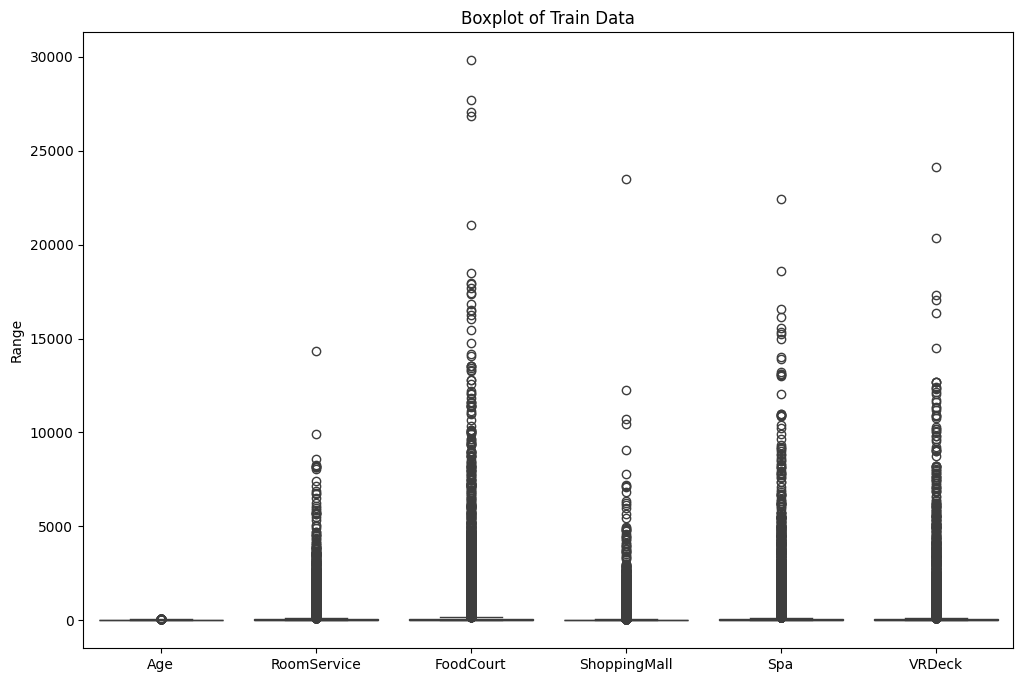

In [139]:
col = train.select_dtypes(include=['float64']).columns
plt.figure(figsize=(12, 8))
sns.boxplot(data= train[col])
plt.title('Boxplot of Train Data')
plt.ylabel('Range')
plt.show()

In [140]:
data= train[col]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           8514 non-null   float64
 1   RoomService   8512 non-null   float64
 2   FoodCourt     8510 non-null   float64
 3   ShoppingMall  8485 non-null   float64
 4   Spa           8510 non-null   float64
 5   VRDeck        8505 non-null   float64
dtypes: float64(6)
memory usage: 407.6 KB


In [141]:
data= test[col]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           4186 non-null   float64
 1   RoomService   4195 non-null   float64
 2   FoodCourt     4171 non-null   float64
 3   ShoppingMall  4179 non-null   float64
 4   Spa           4176 non-null   float64
 5   VRDeck        4197 non-null   float64
dtypes: float64(6)
memory usage: 200.6 KB


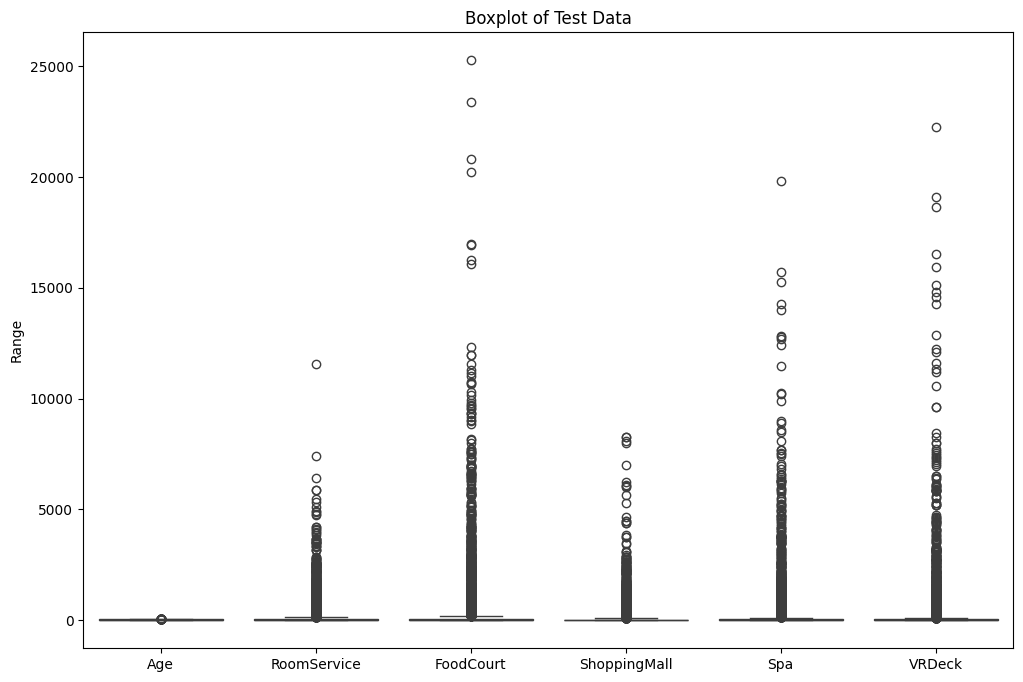

In [142]:
plt.figure(figsize=(12, 8))
sns.boxplot(data= test[col])
plt.title('Boxplot of Test Data')
plt.ylabel('Range')
plt.show()

     HomePlanet CryoSleep    Destination   Age    VIP  RoomService  FoodCourt  \
0        Europa     False    TRAPPIST-1e  39.0  False          0.0        0.0   
1         Earth     False    TRAPPIST-1e  24.0  False        109.0        9.0   
2        Europa     False    TRAPPIST-1e  58.0   True         43.0     3576.0   
3        Europa     False    TRAPPIST-1e  33.0  False          0.0     1283.0   
4         Earth     False    TRAPPIST-1e  16.0  False        303.0       70.0   
...         ...       ...            ...   ...    ...          ...        ...   
8688     Europa     False    55 Cancri e  41.0   True          0.0     6819.0   
8689      Earth      True  PSO J318.5-22  18.0  False          0.0        0.0   
8690      Earth     False    TRAPPIST-1e  26.0  False          0.0        0.0   
8691     Europa     False    55 Cancri e  32.0  False          0.0     1049.0   
8692     Europa     False    TRAPPIST-1e  44.0  False        126.0     4688.0   

      ShoppingMall     Spa 

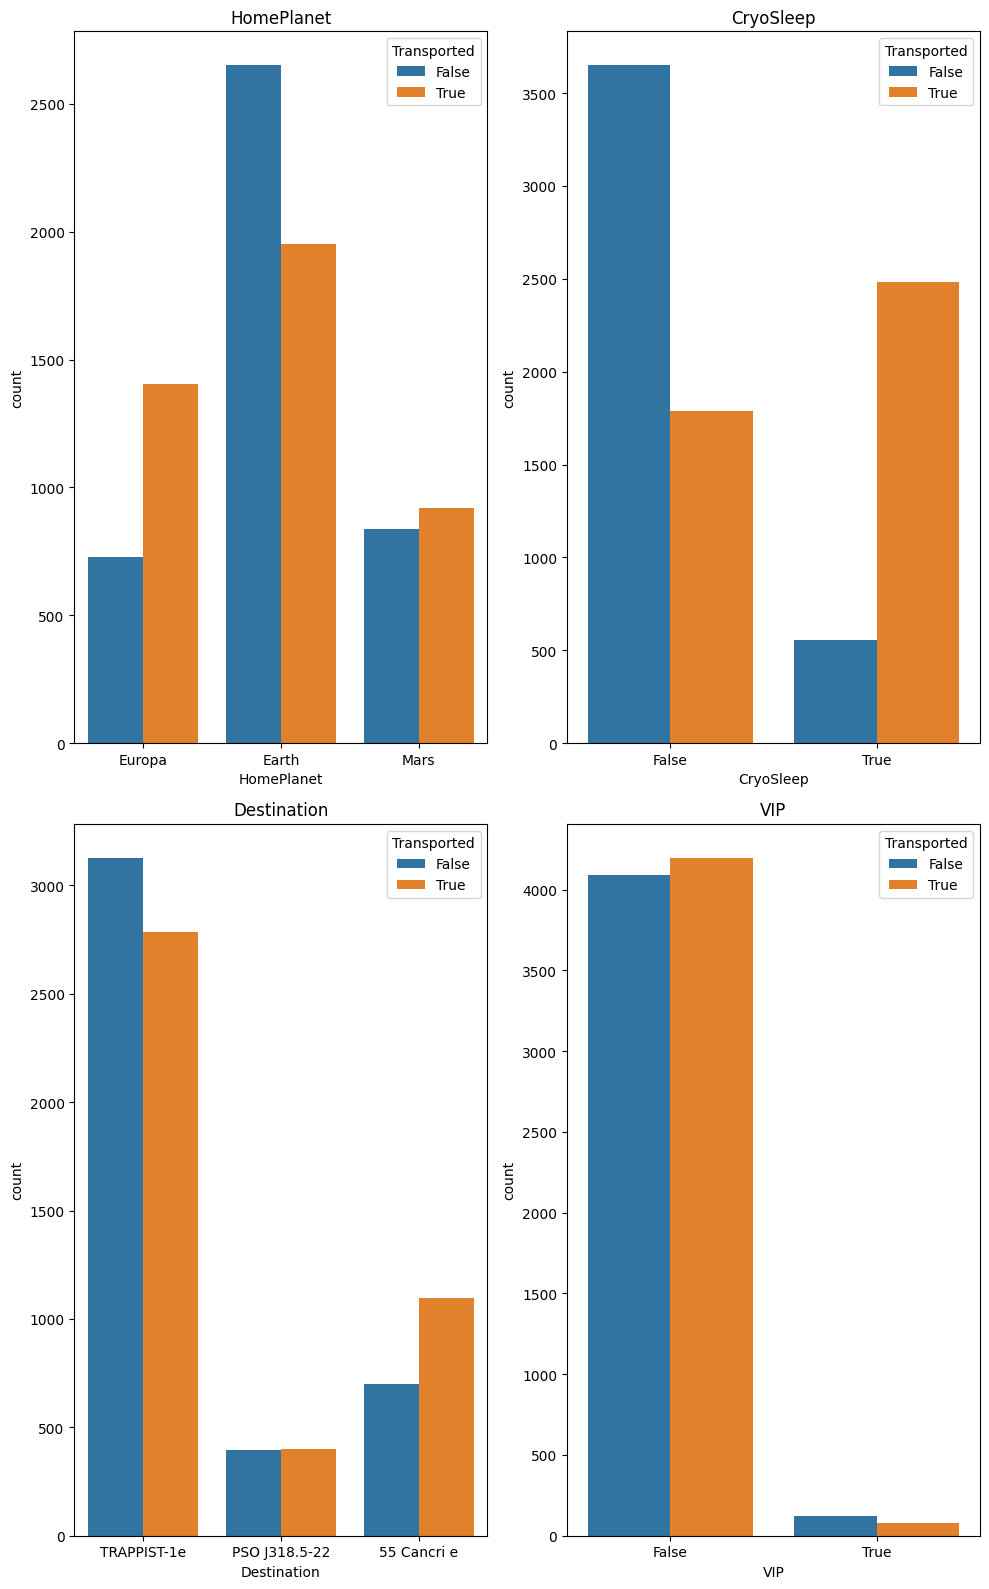

In [143]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(2,2,i+1)
    print(train, var_name)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [144]:
na_cols=train.columns[train.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(train[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


In [145]:
na_cols=test.columns[test.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(test[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(test),2)
mv

,Number_missing,Percentage_missing
HomePlanet,87,2.03
CryoSleep,93,2.17
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36
VRDeck,80,1.87


In [146]:
# Encoding categorical features in both training and test data
from sklearn.preprocessing import LabelEncoder, StandardScaler
def encode_categorical_features(train, test):
    encoder = LabelEncoder()
    for dataset in [train, test]:
        for column in dataset.select_dtypes(include=['object']).columns:
            dataset[column] = encoder.fit_transform(dataset[column])
    return train, test
train, test = encode_categorical_features(train, test)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [147]:
#  Imputing missing values in both training and test data using IterativeImputer
from fancyimpute import IterativeImputer
mice_imputer = IterativeImputer()
X_imputed = mice_imputer.fit_transform(train)
Y_imputed = mice_imputer.fit_transform(test)
train_imputed  = pd.DataFrame(X_imputed)
test_imputed = pd.DataFrame(Y_imputed)
train_imputed.columns = train.columns
test_imputed.columns = test.columns
train_imputed.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0
2,1.0,0.0,2.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0
3,1.0,0.0,2.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0
4,0.0,0.0,2.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0


In [148]:
# Displaying the first few rows of the imputed test data
test_imputed.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,1.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0
2,1.0,1.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,2.0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0
4,0.0,0.0,2.0,20.0,0.0,10.0,0.0,635.0,0.0,0.0


In [149]:
# Displaying information about the imputed test data
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   float64
 1   CryoSleep     4277 non-null   float64
 2   Destination   4277 non-null   float64
 3   Age           4277 non-null   float64
 4   VIP           4277 non-null   float64
 5   RoomService   4277 non-null   float64
 6   FoodCourt     4277 non-null   float64
 7   ShoppingMall  4277 non-null   float64
 8   Spa           4277 non-null   float64
 9   VRDeck        4277 non-null   float64
dtypes: float64(10)
memory usage: 334.3 KB


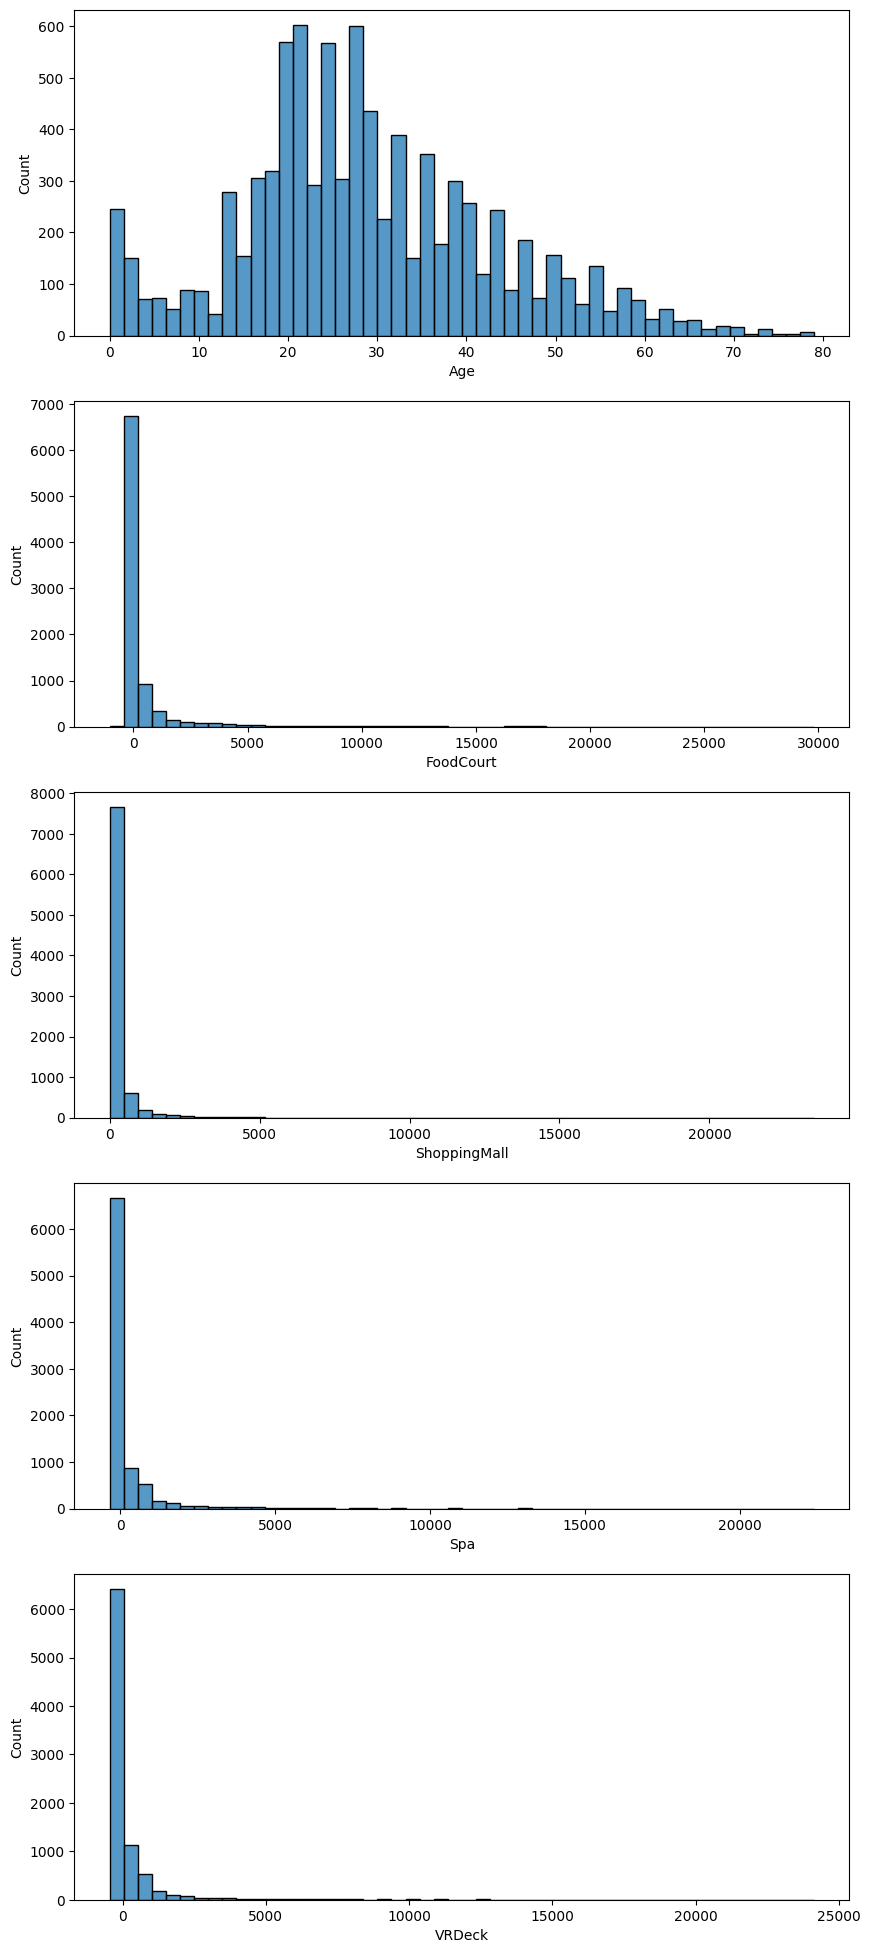

In [150]:
# Visualizing distributions of selected features using seaborn
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)


sns.histplot(train_imputed['Age'], color=None, bins=50, ax=ax[0]);
sns.histplot(train_imputed['FoodCourt'], color=None, bins=50, ax=ax[1]);
sns.histplot(train_imputed['ShoppingMall'], color=None, bins=50, ax=ax[2]);
sns.histplot(train_imputed['Spa'], color=None, bins=50, ax=ax[3]);
sns.histplot(train_imputed['VRDeck'], color=None, bins=50, ax=ax[4]);

In [151]:
train_imputed['Age'].describe()

train_imputed['ShoppingMall'].describe()
train_imputed['Spa'].describe()
train_imputed['VRDeck'].describe()

count     8693.000000
mean       303.897987
std       1134.396691
min       -450.033435
25%          0.000000
50%          0.000000
75%         59.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [152]:
train_imputed['FoodCourt'].describe()

count     8693.000000
mean       457.936606
std       1596.065835
min      -1041.177678
25%          0.000000
50%          0.000000
75%        104.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [153]:
train_imputed['ShoppingMall'].describe()


count     8693.000000
mean       173.746457
std        597.441364
min          0.000000
25%          0.000000
50%          0.000000
75%         45.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

In [154]:
train_imputed['Spa'].describe()


count     8693.000000
mean       310.613831
std       1125.777757
min       -347.858497
25%          0.000000
50%          0.000000
75%         74.000000
max      22408.000000
Name: Spa, dtype: float64

In [155]:
train_imputed['VRDeck'].describe()

count     8693.000000
mean       303.897987
std       1134.396691
min       -450.033435
25%          0.000000
50%          0.000000
75%         59.000000
max      24133.000000
Name: VRDeck, dtype: float64

In [156]:
# Standardizing numerical features in both training and test data
def standardize_numerical_features(train, test):
    scaler = StandardScaler()
    numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
    test[numerical_columns] = scaler.transform(test[numerical_columns])
    return train, test

train_data, test_data = standardize_numerical_features(train_imputed, test_imputed)

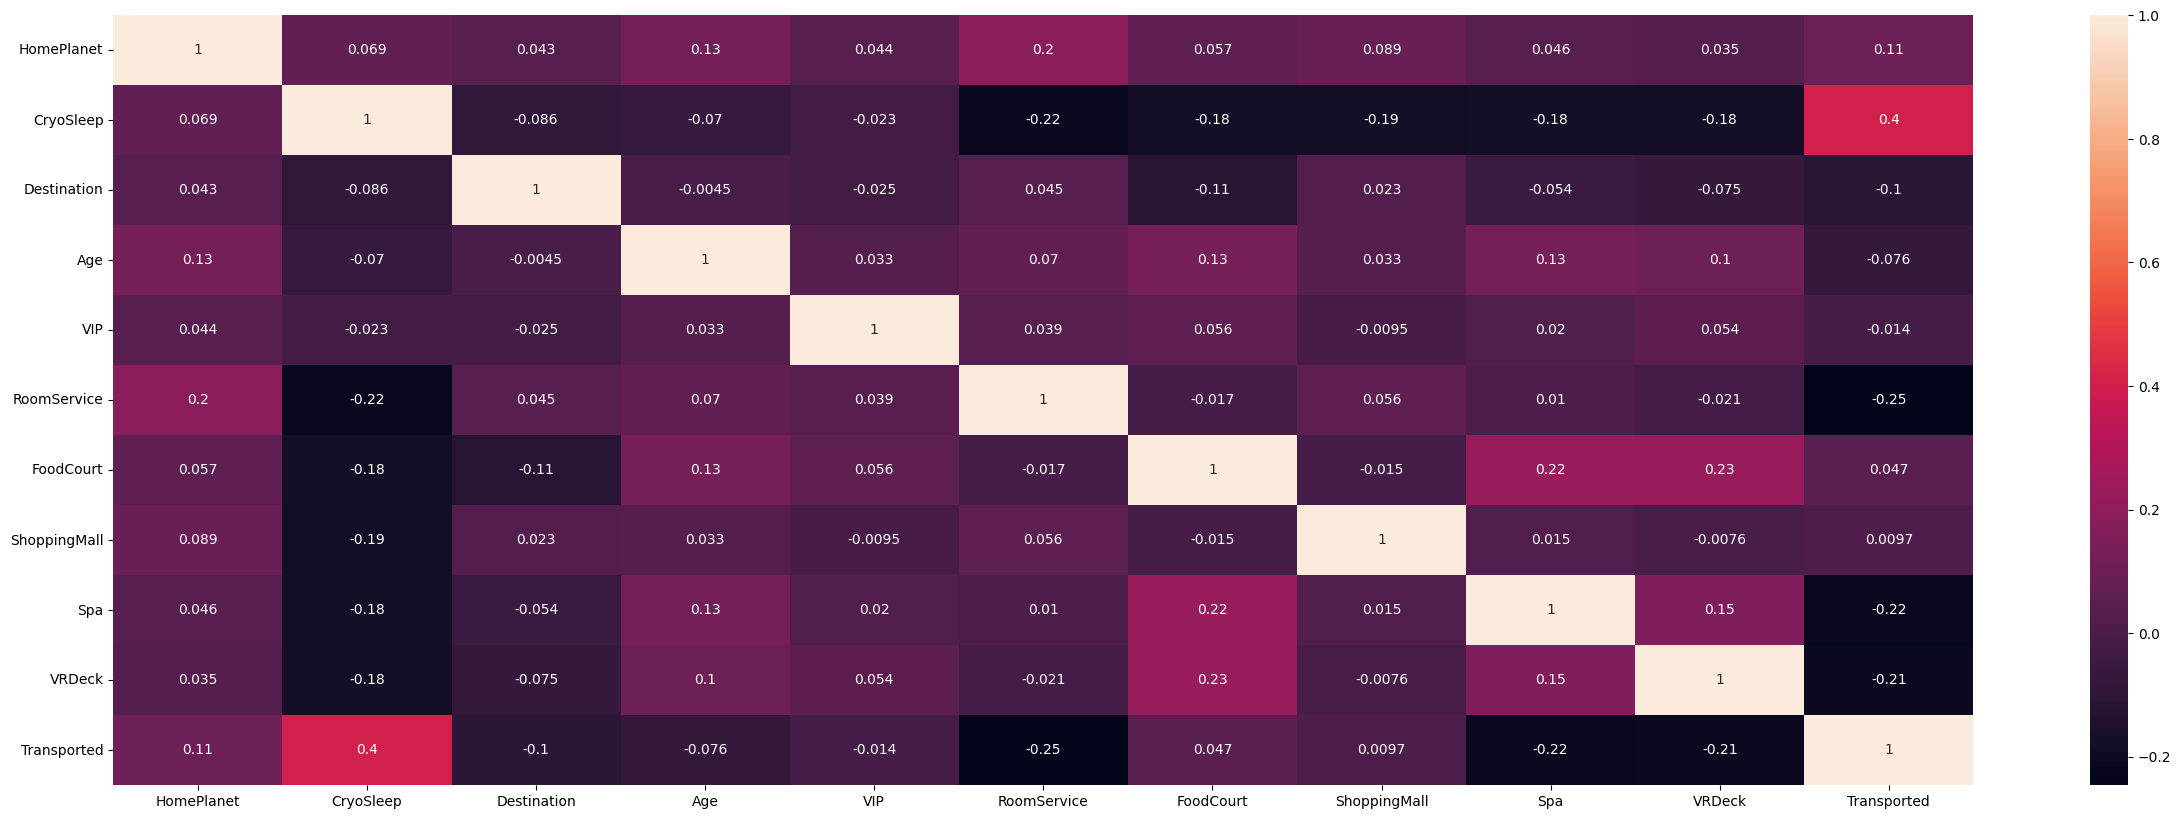

In [157]:
# Visualizing correlation matrix using a heatmap
plt.figure(figsize=(30,10))
sns.heatmap(train_imputed.corr(), annot=True);

In [158]:
# Importing necessary modules from H2O
import h2o
from h2o.automl import H2OAutoML

In [159]:
# Initializing H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_17seinb
  JVM stdout: /tmp/tmp_17seinb/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_17seinb/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_fyhkul
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [160]:
# Create a dictionary to map boolean values to labels
boolean_to_label = {0: "Not transported", 1: "Transported"}

#Mapping boolean values in the target column to labels and converting data to H2OFrame
train_data['Transported'] = train_data['Transported'].map(boolean_to_label)

train_h2o = h2o.H2OFrame(train_data)
test_h2o = h2o.H2OFrame(test_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [161]:
# Displaying summary statistics of the test data in H2OFrame
test_h2o.describe()

Rows:4277
Cols:10

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
type,int,int,int,real,int,real,real,real,real,real
mins,0.0,0.0,0.0,-2.0095269275641776,0.0,-0.9949640919714802,-0.2869323667028233,-0.29083431694665723,-0.27592630657299133,-0.26790933906249703
mean,0.727846621463642,0.4044891278933835,1.537526303483752,-0.01119002225155882,0.06079027355623102,-0.008591896389538884,-0.011097021290121297,0.006380027198989279,-0.007101708915625324,0.005720676968141857
maxs,3.0,2.0,3.0,3.497464315518205,2.0,17.165858950904223,15.54853833158101,13.589150356462737,17.352012561936817,19.3665636084881
sigma,0.8676729126222249,0.5333222314945057,0.8276708656271314,0.9783534312415662,0.3171856954622039,0.9106306015281522,0.947003693553648,0.9280784157100787,0.9809628367153861,1.0894600736457323
zeros,2263,2640,841,0,4110,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0
0,0.0,1.0,2.0,-0.1273906799284267,0.0,-0.3401231173769489,-0.2869323667028233,-0.29083431694665723,-0.27592630657299133,-0.26790933906249703
1,0.0,0.0,2.0,-0.6850606792279085,0.0,-0.3401231173769489,-0.2812931772008032,-0.29083431694665723,2.2318176677166273,-0.26790933906249703
2,1.0,1.0,0.0,0.1514443197213142,0.0,-0.3401231173769489,-0.2869323667028233,-0.29083431694665723,-0.27592630657299133,-0.26790933906249703


In [162]:
x = train_h2o.columns[:-1]  # Assuming the last column is the target
y = train_h2o.columns[-1]


In [163]:
# Split data into training and validation sets
train_h2o, valid_h2o = train_h2o.split_frame(ratios=[0.8], seed=1234)

AutoML progress: |
13:04:09.59: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
DRF_1_AutoML_1_20240320_130408,0.980702,0.21261,0.979792,0.071037,0.245349,0.0601963,1351,0.019794,DRF
StackedEnsemble_BestOfFamily_3_AutoML_1_20240320_130408,0.957558,0.352441,0.958254,0.122579,0.326366,0.106514,2047,0.037371,StackedEnsemble
GBM_4_AutoML_1_20240320_130408,0.943144,0.32122,0.944704,0.143268,0.31488,0.0991496,1330,0.023367,GBM
XRT_1_AutoML_1_20240320_130408,0.93899,0.409563,0.930844,0.126012,0.310265,0.0962643,236,0.003914,DRF
GBM_3_AutoML_1_20240320_130408,0.931422,0.344675,0.935181,0.156098,0.328889,0.108168,1465,0.024662,GBM
StackedEnsemble_BestOfFamily_2_AutoML_1_20240320_130408,0.929241,0.347211,0.934052,0.160372,0.332381,0.110477,6209,0.038367,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_1_20240320_130408,0.928848,0.347703,0.933549,0.162029,0.332602,0.110624,7203,0.096808,StackedEnsemble
XGBoost_1_AutoML_1_20240320_130408,0.926559,0.348361,0.930315,0.157516,0.33114,0.109654,5443,0.006974,XGBoost
XGBoost_2_AutoML_1_20240320_130408,0.925895,0.351435,0.929842,0.163859,0.333174,0.111005,1762,0.005219,XGBoost
GBM_2_AutoML_1_20240320_130408,0.924769,0.360518,0.929487,0.163159,0.337126,0.113654,1127,0.015777,GBM


# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

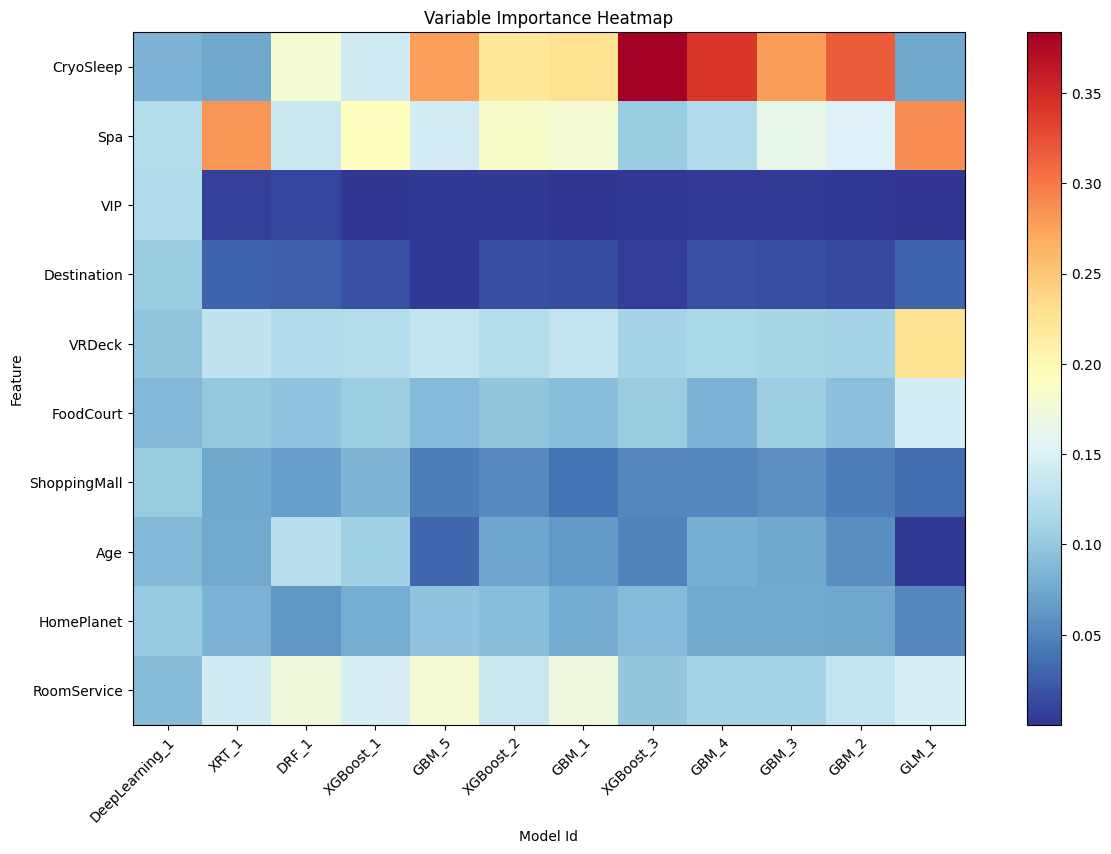

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

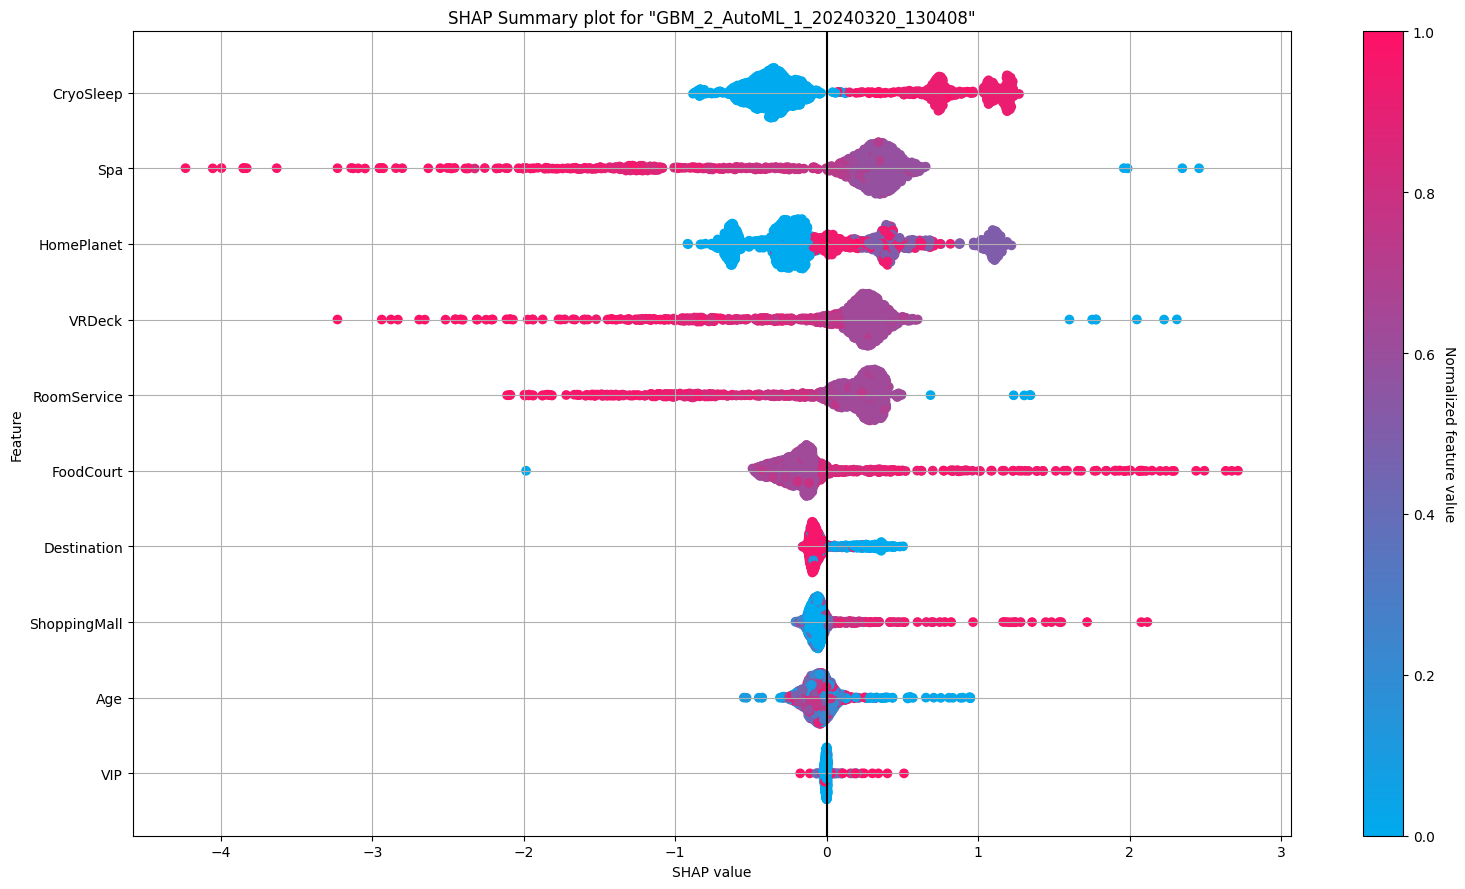

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

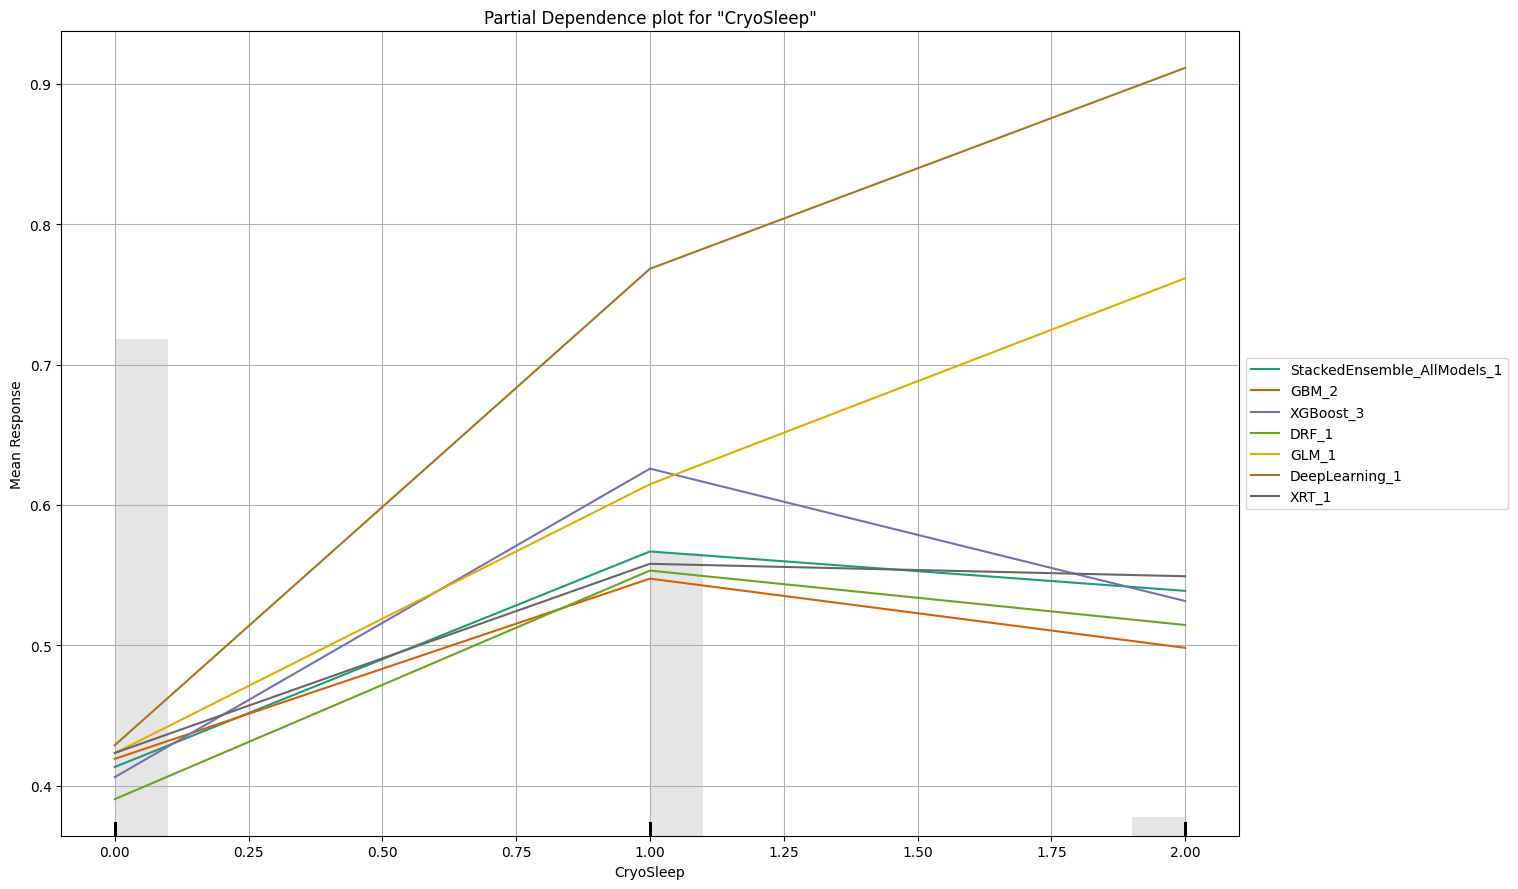

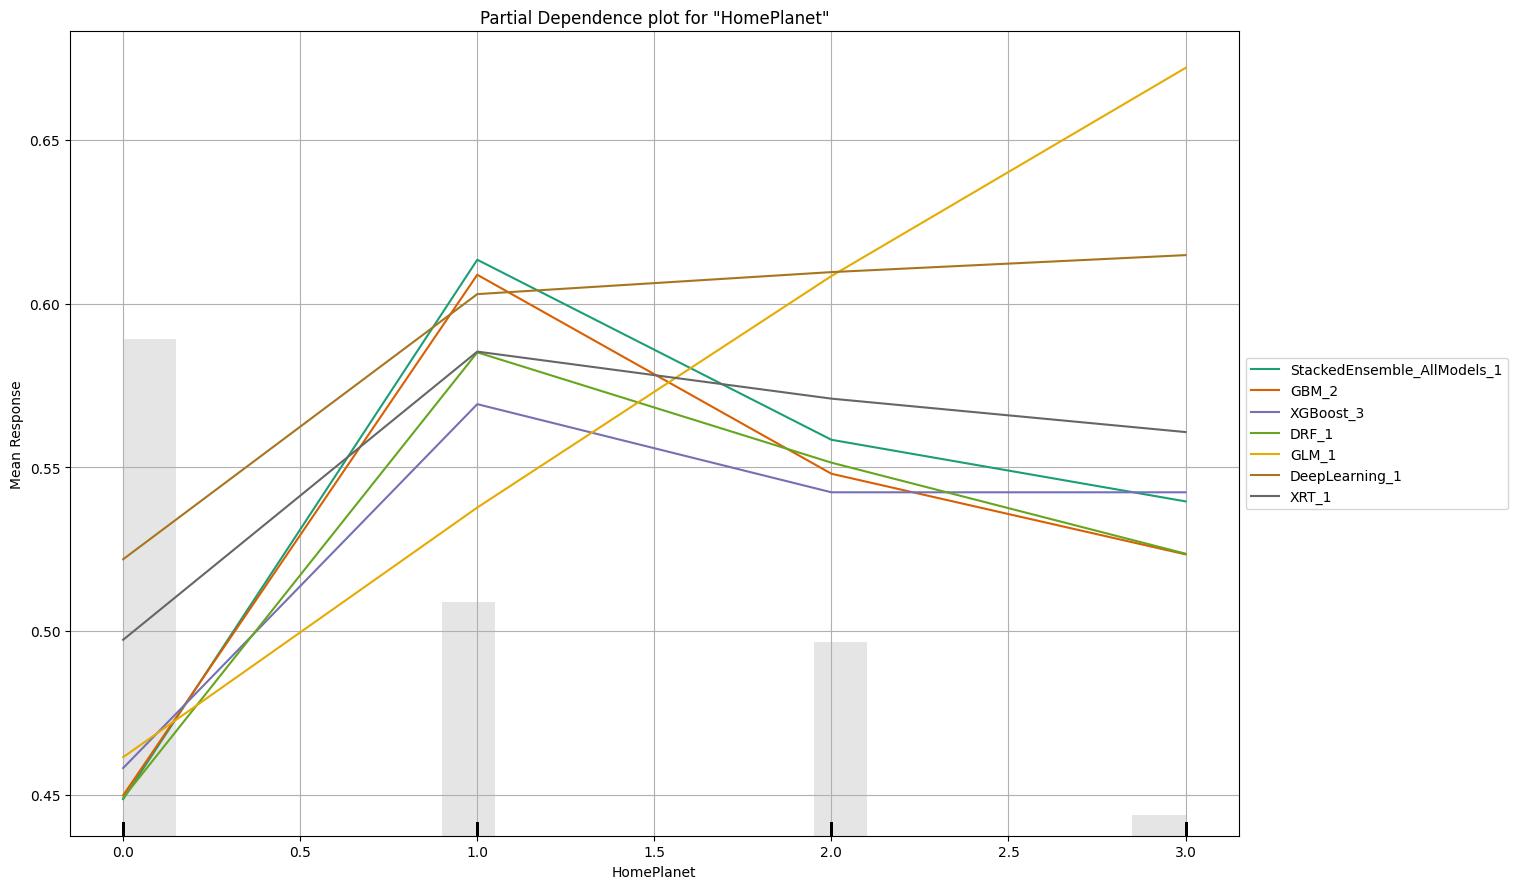

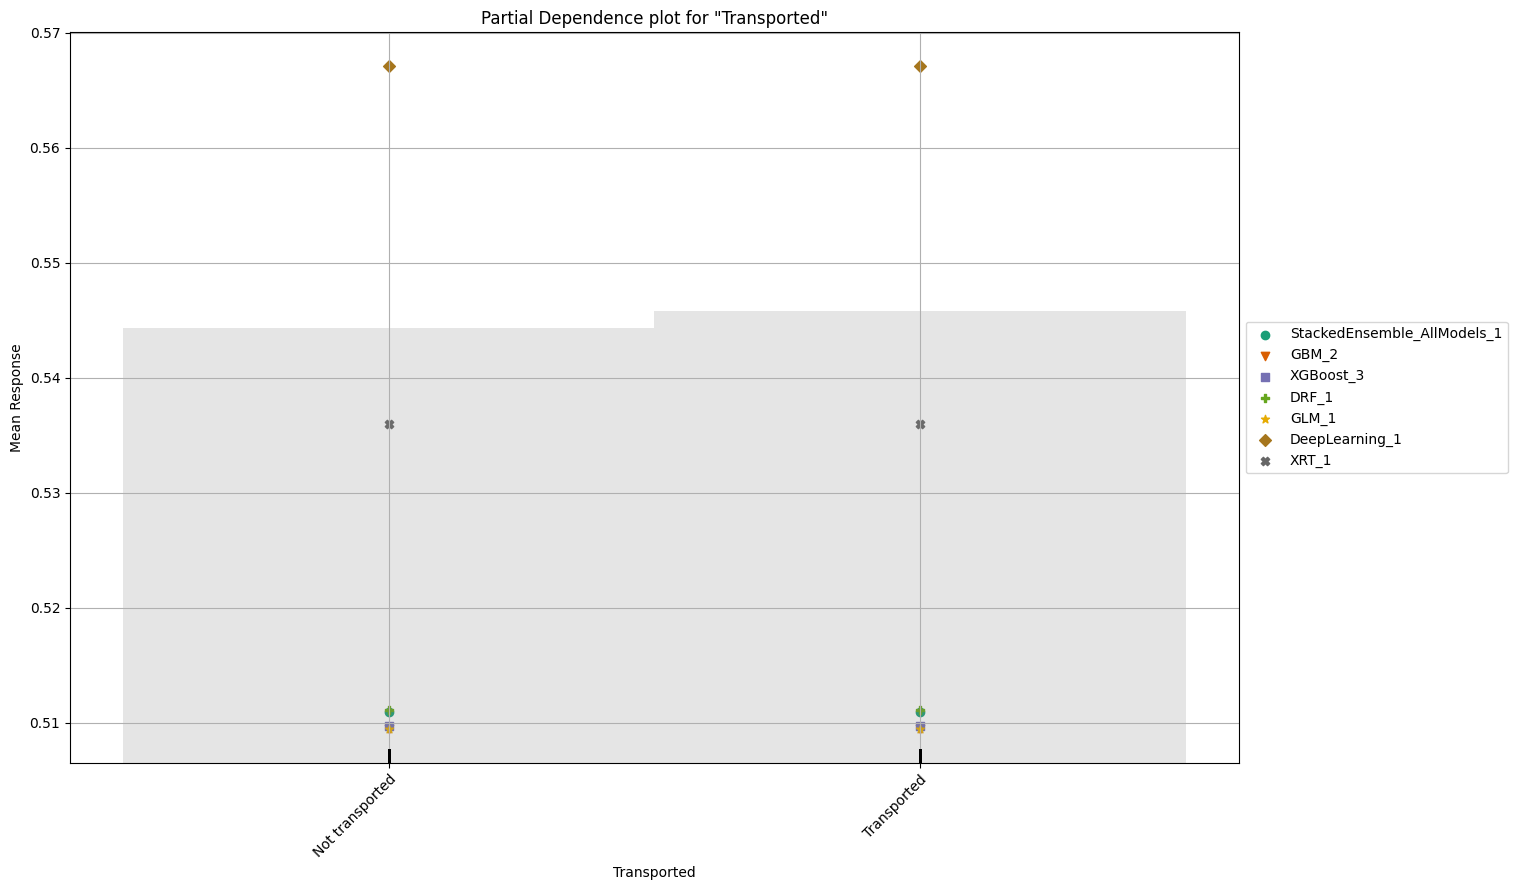

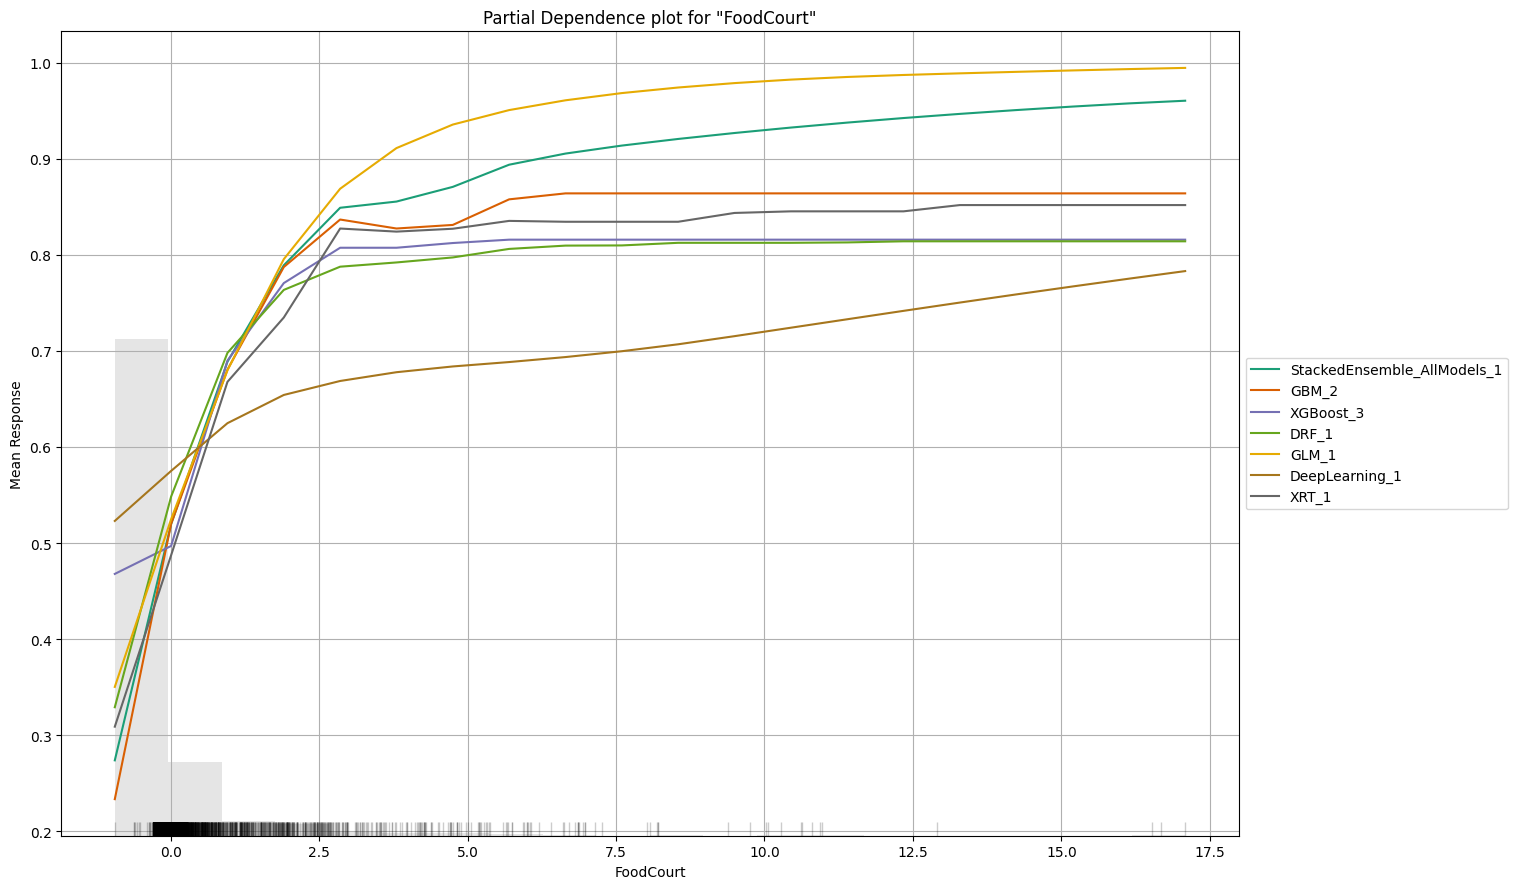

In [164]:
aml = H2OAutoML(max_runtime_secs=120,)  # Adjust max runtime as needed
aml.train(x=x, y=y, training_frame=train_h2o, validation_frame=valid_h2o)

aml.explain(train_h2o, include_explanations=['leaderboard', 'varimp_heatmap', 'pdp', 'ice', 'shap_summary'], \
           columns =['CryoSleep','HomePlanet','Transported','FoodCourt'])
# View the AutoML Leaderboard
lb = aml.leaderboard
#print(lb)
# Get the best model from AutoML
best_model = aml.leader

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

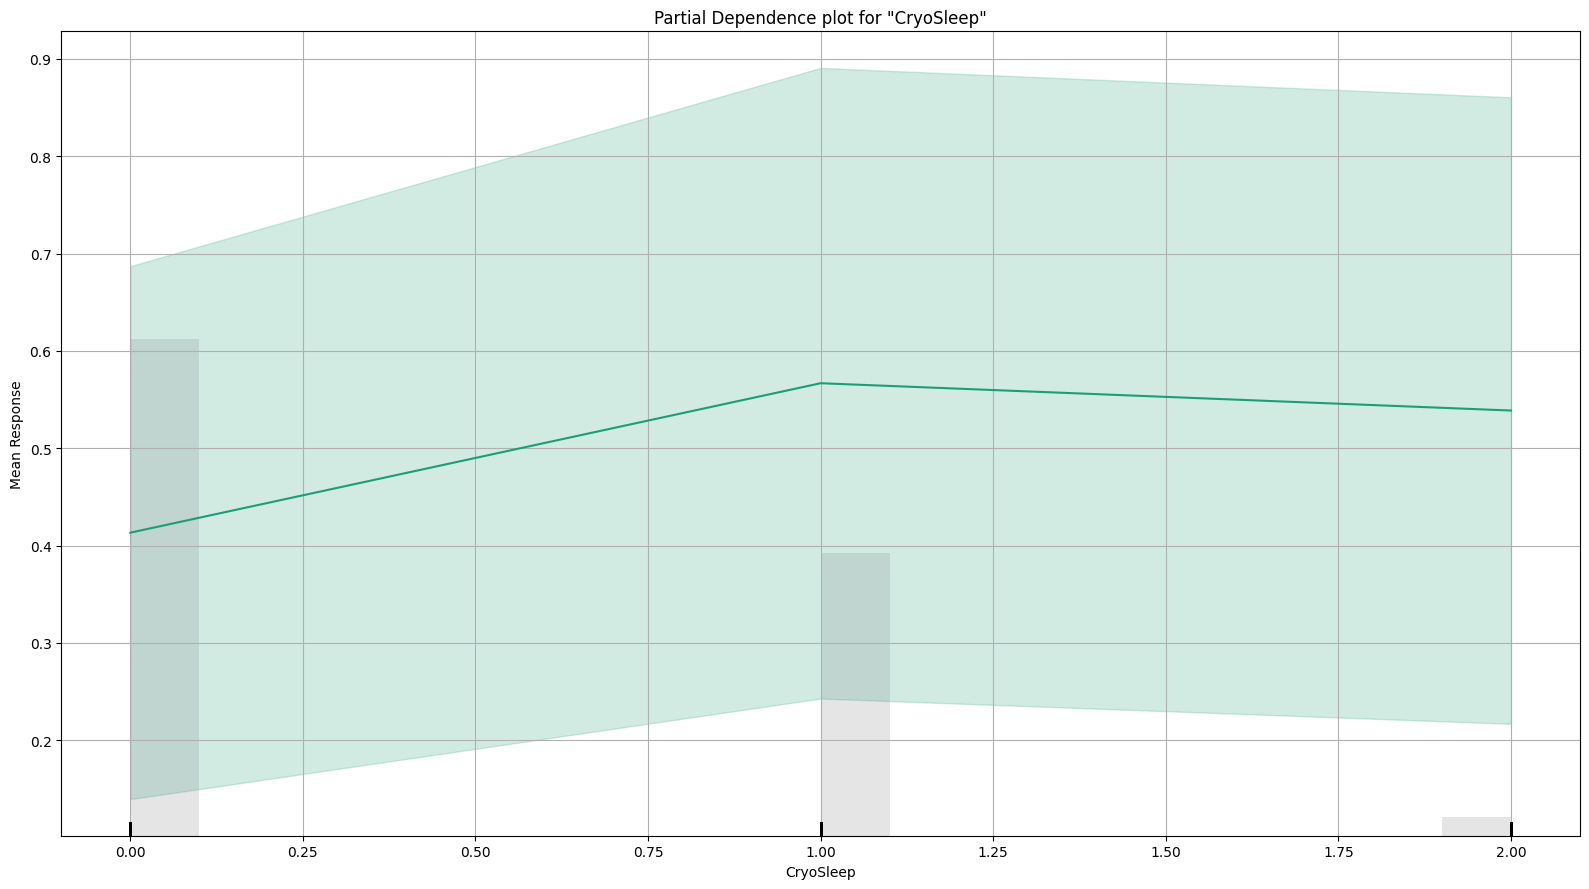

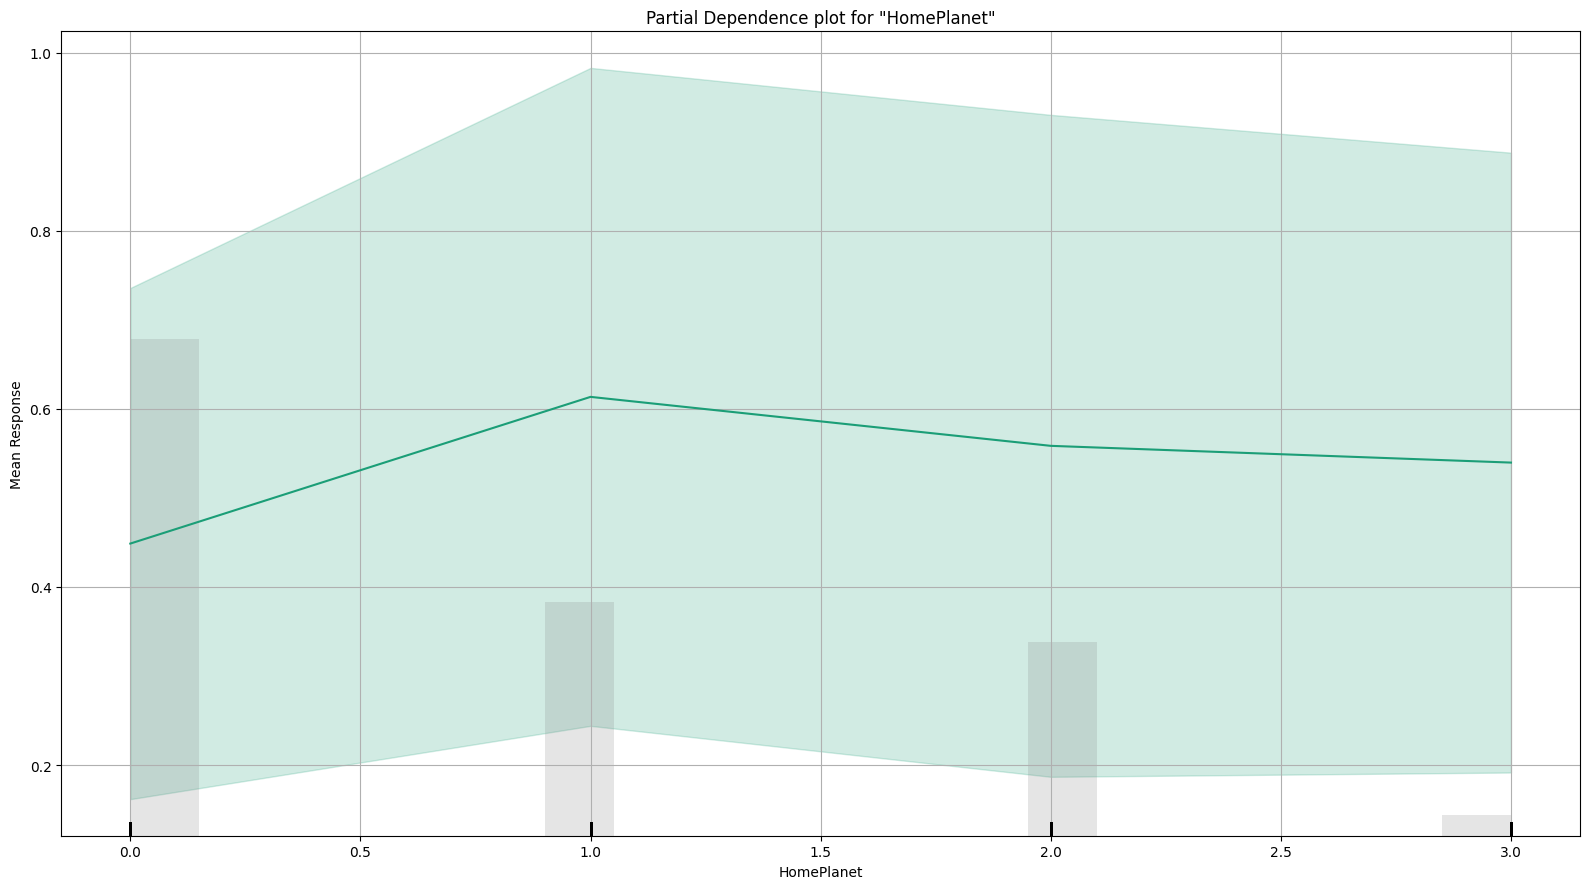

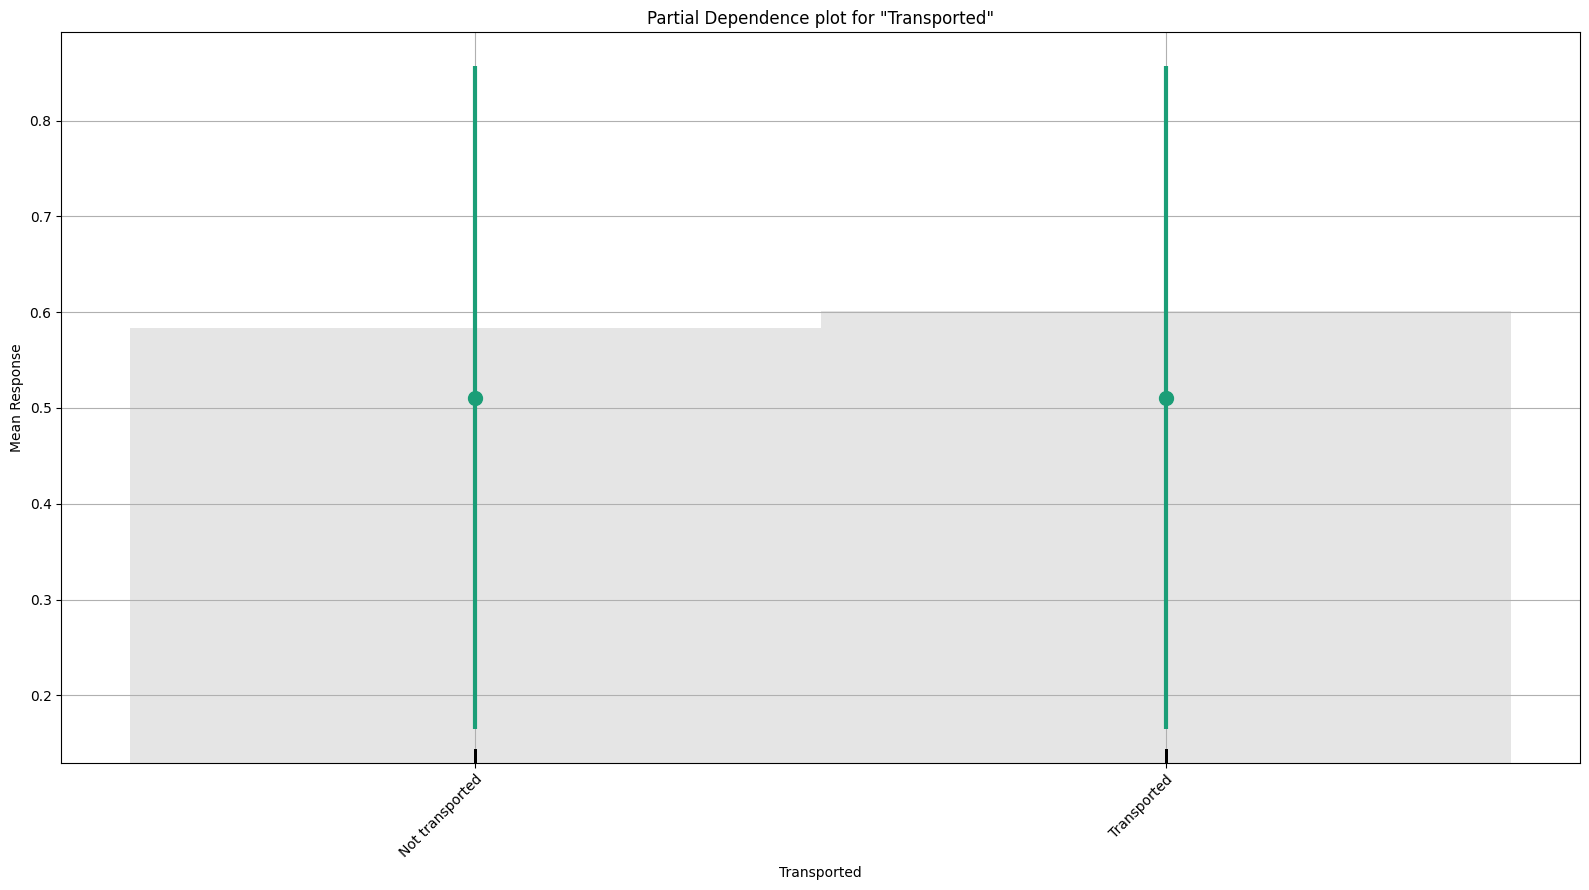

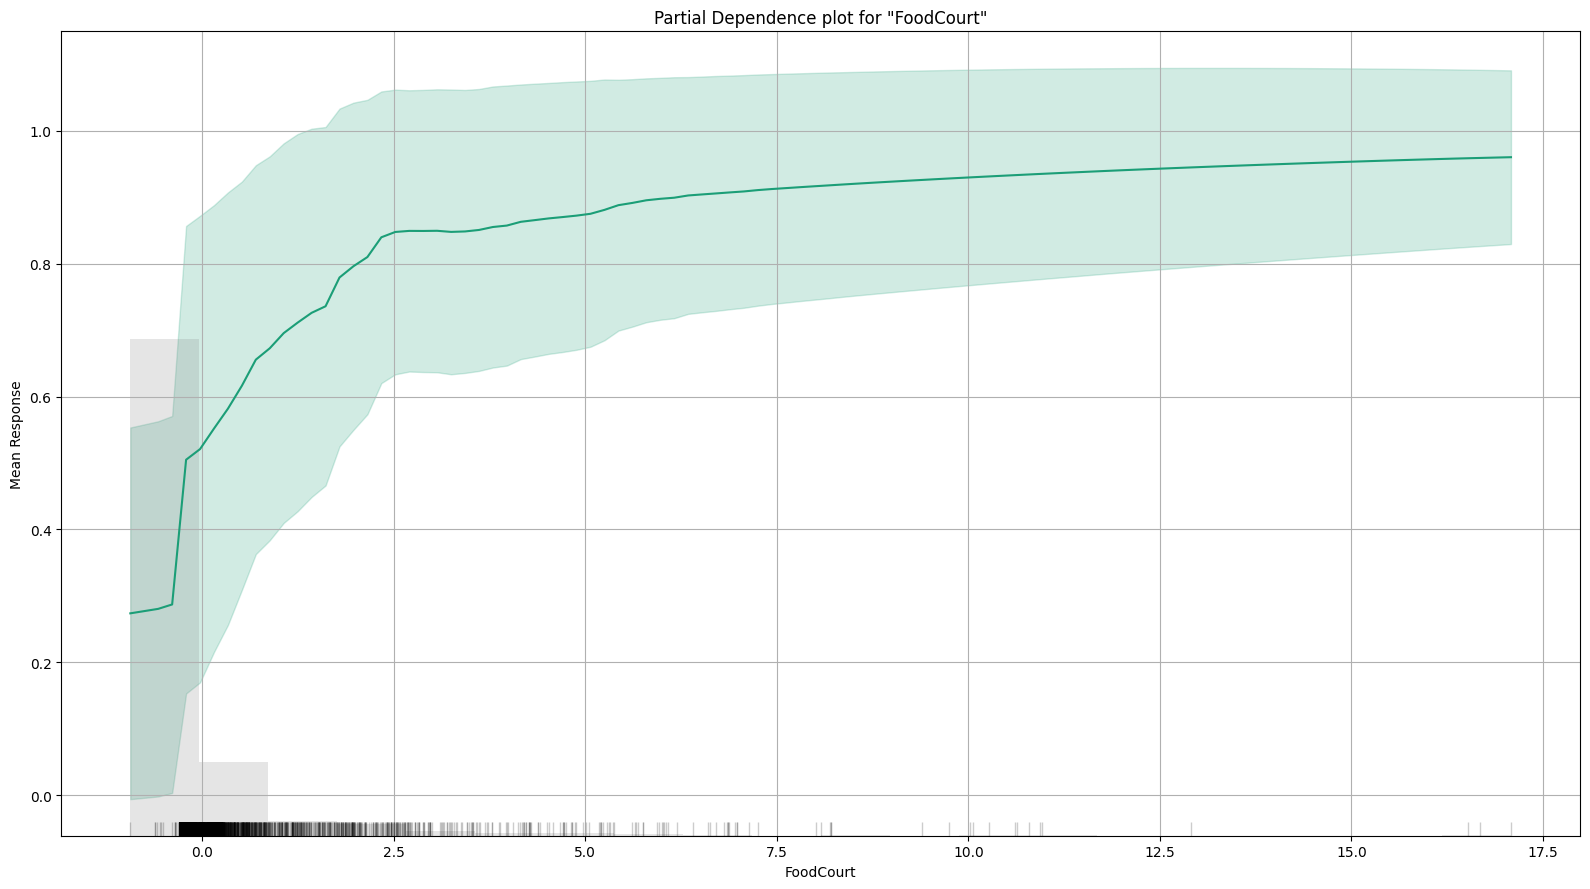

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

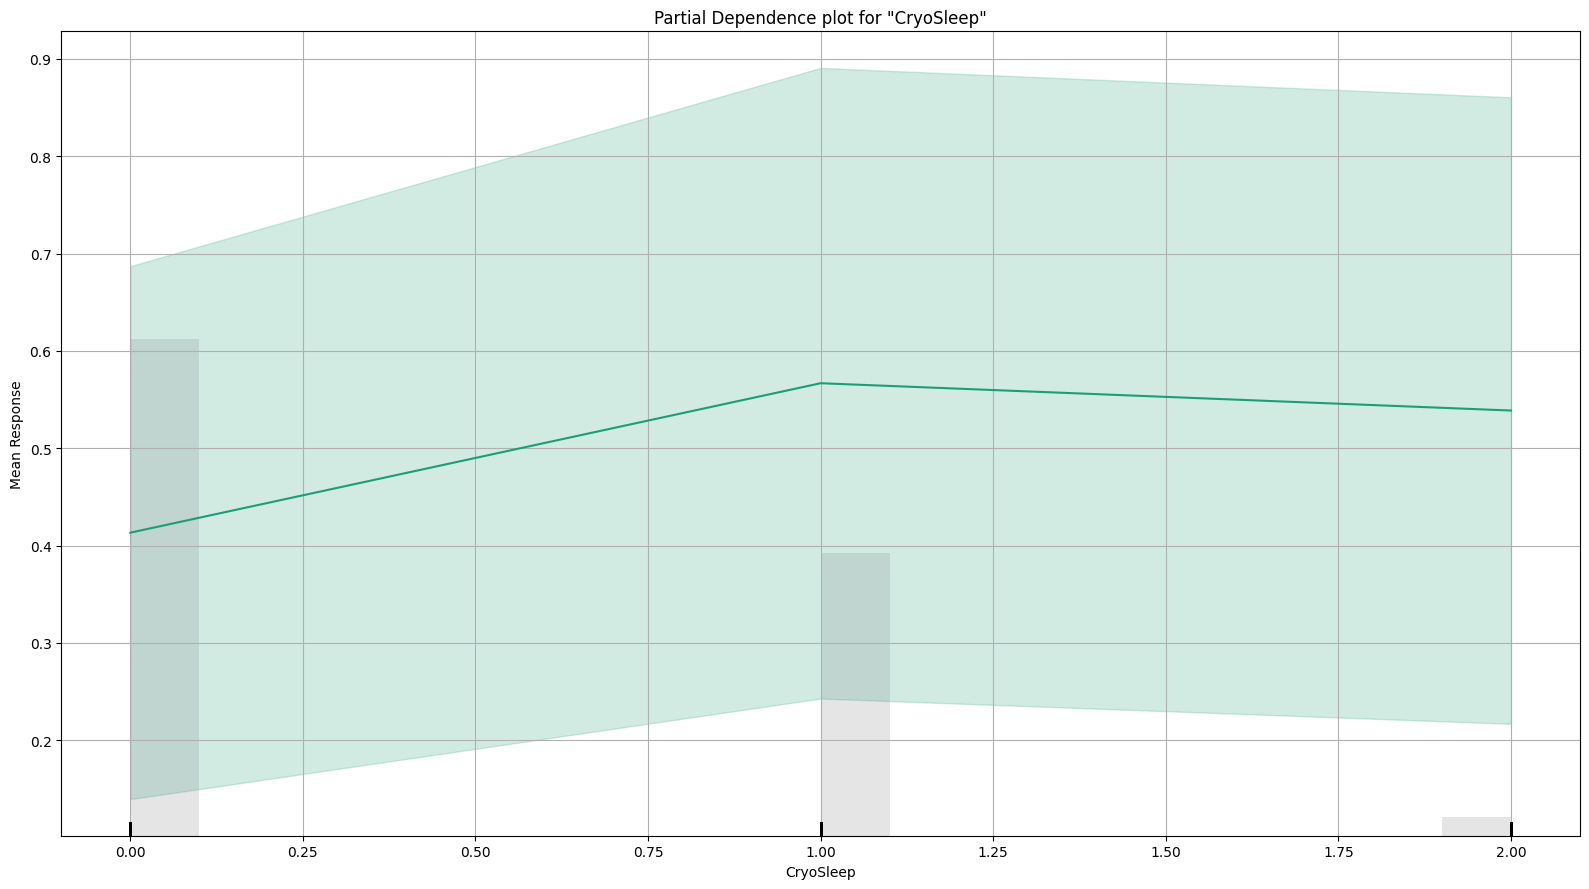

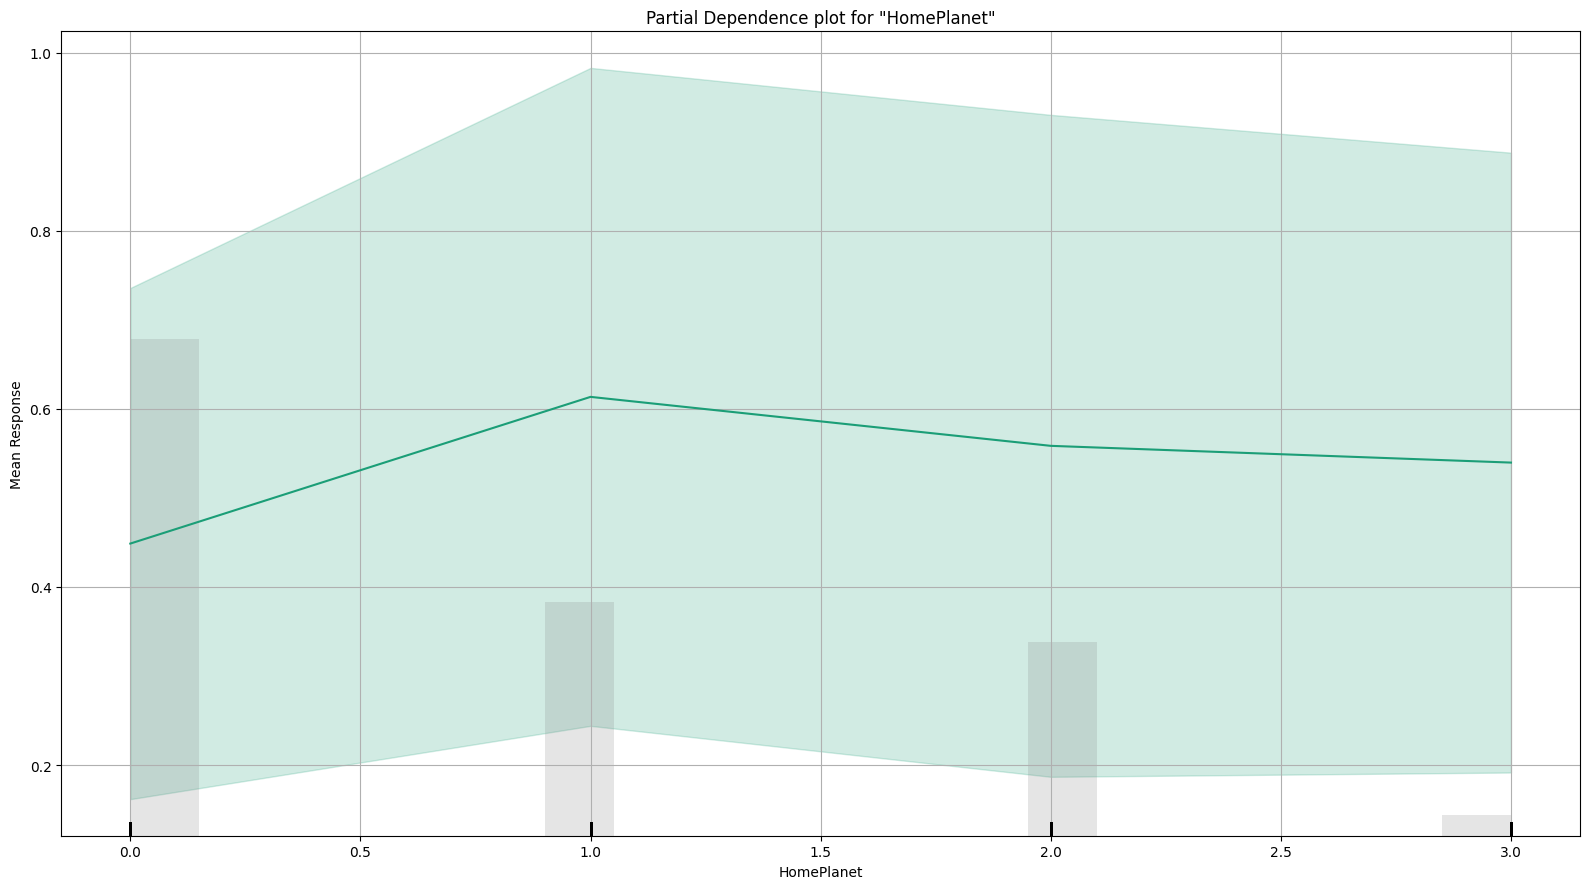

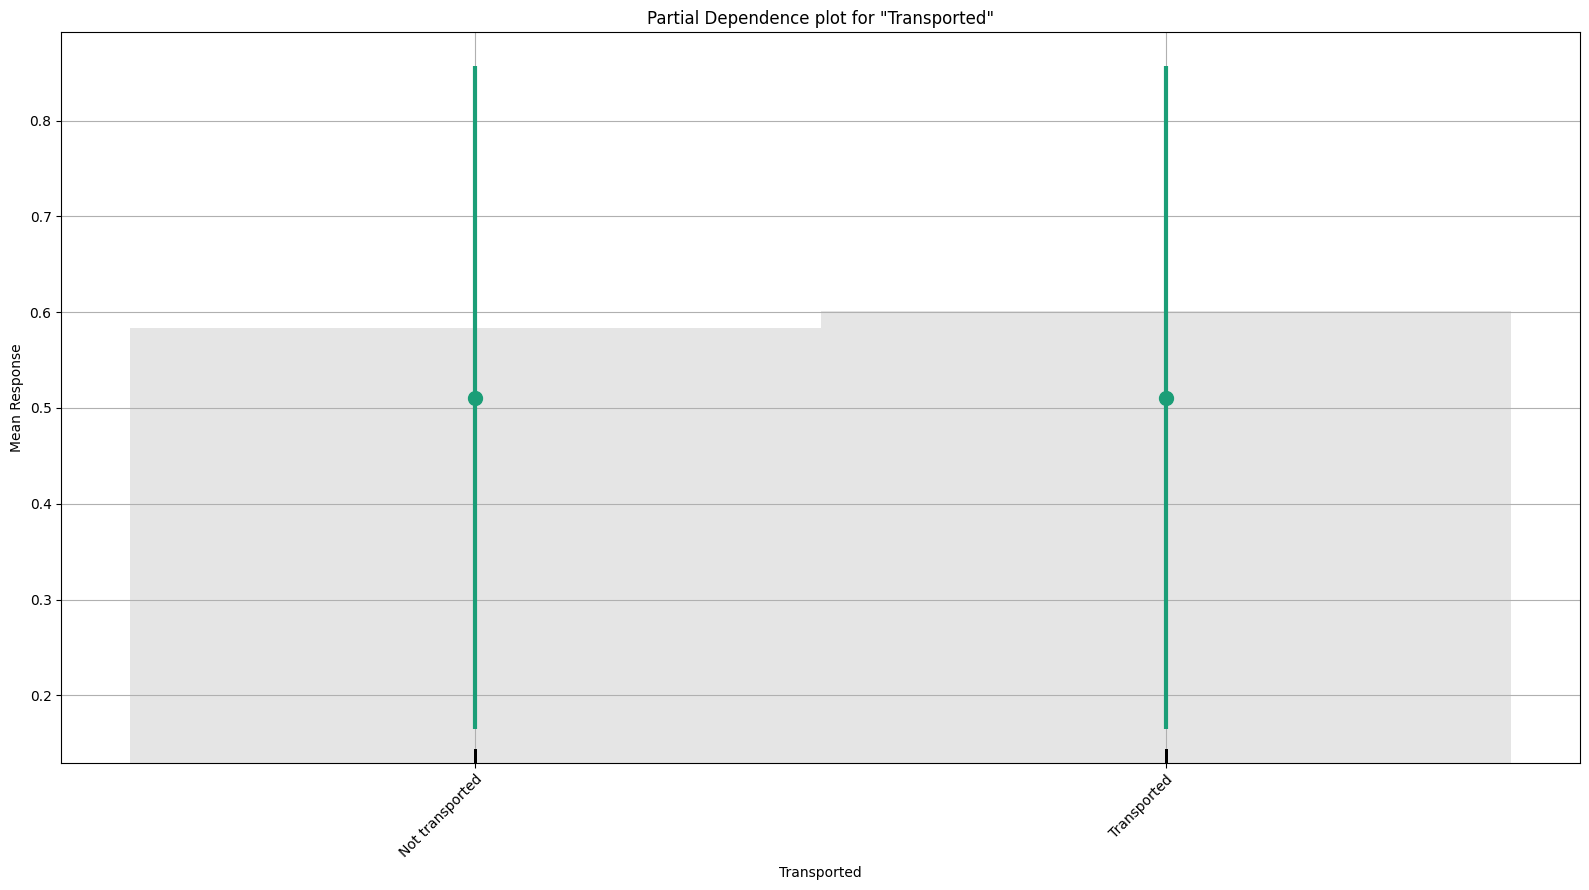

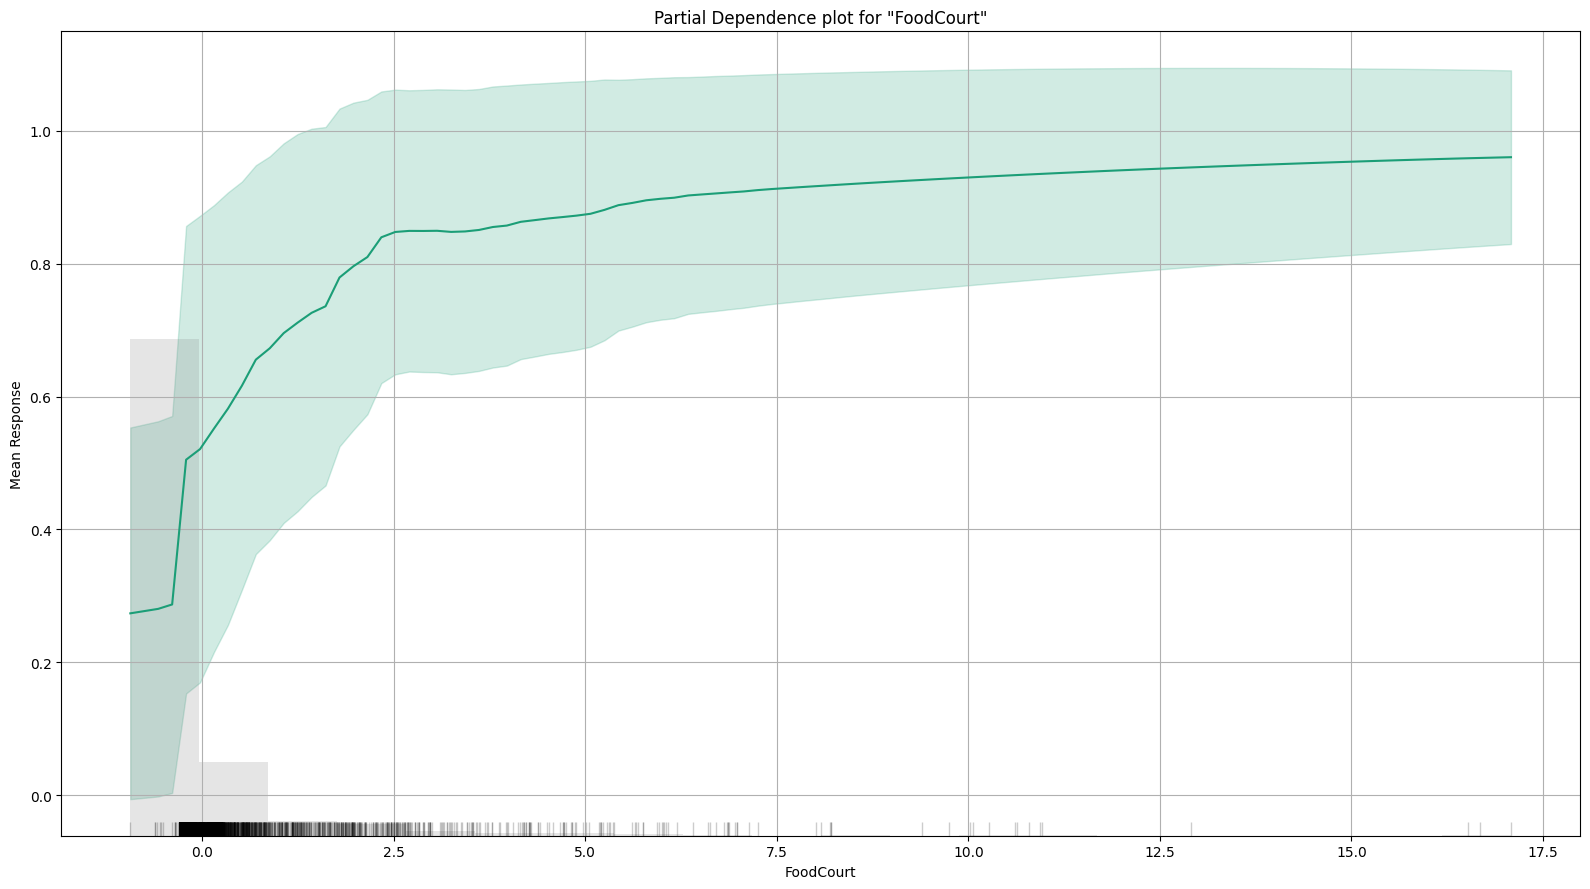

In [165]:
best_model.explain(train_h2o, include_explanations=['varimp_heatmap', 'pdp', 'ice', 'shap_summary'], \
           columns =['CryoSleep','HomePlanet','Transported','FoodCourt'])

In [166]:
y_pred = best_model.predict(test_h2o)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [167]:
y_pred.head(10)

predict,Not transported,Transported
Transported,0.360756,0.639244
Not transported,0.988169,0.0118309
Transported,0.0125914,0.987409
Transported,0.0293091,0.970691
Transported,0.429701,0.570299
Transported,0.247271,0.752729
Transported,0.0122888,0.987711
Transported,0.0416454,0.958355
Transported,0.0115282,0.988472
Transported,0.455203,0.544797


In [168]:
predictions_df = y_pred.as_data_frame()

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [169]:
# Shut down the H2O cluster
h2o.shutdown()

H2O session _sid_bb47 closed.


<ipython-input-169-58ff2730c230>:2: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  h2o.shutdown()


In [170]:
predictions_df

,predict,Not transported,Transported
0,Transported,0.360756,0.639244
1,Not transported,0.988169,0.011831
2,Transported,0.012591,0.987409
3,Transported,0.029309,0.970691
4,Transported,0.429701,0.570299
...,...,...,...
4272,Transported,0.347045,0.652955
4273,Not transported,0.556334,0.443666
4274,Transported,0.054950,0.945050
4275,Transported,0.179540,0.820460


In [171]:
from google.colab import files

# Preparing Kaggle submission file
submission = pd.DataFrame({'PassengerId': test_original['PassengerId'], 'Transported': predictions_df['predict']})

# Convert 0s and 1s to "False" and "True"
submission.replace({'Not transported': False, 'Transported': True}, inplace=True)

# Write the dataFrame to a .csv file
submission.to_csv('submission_Test.csv', index=False)

#Download the .csv file
files.download("submission_Test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [172]:
submission.describe()

,PassengerId,Transported
count,4277,4277
unique,4277,2
top,0013_01,True
freq,1,2425
